In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls "gdrive/My Drive/"

 ApneaData.csv	'Colab Notebooks'   Study
 ApneaData.pkl	 Invoices	   'TE Study Material'


Data set Link https://drive.google.com/drive/folders/1sRE-iJFwQcOUNFJMUFM-17nH_xUFKoHa?usp=sharing

In [0]:
import pickle
filename = "gdrive/My Drive/ApneaData.csv"
f = open(filename,'rb')
data = f.read()
f.close()
rows = data.split(b"\n")
print("Dataset contains "+str(len(rows))+ " patients data")
d = []


for row in rows:
    rowSplit = list(map(int,row.split(b" ")))
    d.append(rowSplit)


f = open('gdrive/My Drive/ApneaData.pkl','wb')
pickle.dump(d,f)


f.close()
print("Done")


Dataset contains 16612 patients data
Done


In [0]:
!ls "gdrive/My Drive"

 ApneaData.csv	'Colab Notebooks'   Study
 ApneaData.pkl	 Invoices	   'TE Study Material'


In [0]:
pip install scipy

In [0]:
 pip install numpy

In [0]:
import numpy as np
from sklearn import svm,naive_bayes,ensemble,linear_model
from sklearn.metrics import accuracy_score
import time
import pickle


filename = "gdrive/My Drive/ApneaData.pkl"
testPercent=20
features = []
classes = []
t = time.time()


f = open(filename,'rb')
data = pickle.load(f)
f.close()
np.random.shuffle(data)


for row in data:
    features.append(row[:-1])
    classes.append(row[-1])



inputLength = len(features)
print("inputLength is "+str(inputLength))

testLength = int(inputLength*0.2)
print("testLength = "+str(testLength))


train_features, train_classes=features[:-testLength], classes[:-testLength]
test_features,test_classes = features[-testLength:],classes[-testLength:]


print("preprocessing time:",(time.time()-t))
t=time.time()
clf=ensemble.RandomForestClassifier(n_estimators=30)

clf.fit(train_features,train_classes)

print("fitting time:",(time.time()-t))

t=time.time()
pred_classes=[]
for e in test_features:
    pred_classes.append(clf.predict([e])[0])
score = accuracy_score(pred_classes,test_classes)*100
print("predicting time:",(time.time()-t))
print("Accuracy:",score)


inputLength is 16612
testLength = 3322
preprocessing time: 12.002280950546265
fitting time: 28.746554136276245
predicting time: 10.07801103591919
Accuracy: 65.83383503913305


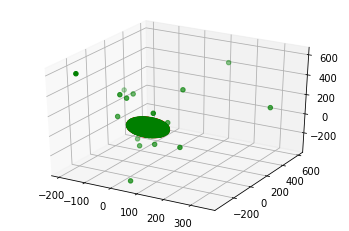

In [0]:
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

filename = "gdrive/My Drive/ApneaData.pkl"
features = []
classes = []
fig=plt.figure()
ax1=fig.add_subplot(111,projection='3d')
f = open(filename,'rb')
data = pickle.load(f)
f.close()
for row in data:
    features.append(row[:-1])
    classes.append(row[-1])
reduced_features = TSNE(n_components=3).fit_transform(features)
classification = {0:[],1:[]}
colors = ('g','r')
for i in range(len(classes)):
    if classes[i]==0:
        classification[0].append(reduced_features[i])
    else:
        classification[1].append(reduced_features[i])
for i in classification.keys():
    x = []
    y = []
    z = []
    for e in classification[i]:
        x.append(e[0])
        y.append(e[1])
        z.append(e[2])
    ax1.scatter(x,y,z,c=colors[i])
plt.show()

6001


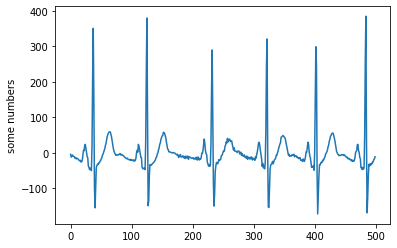

In [0]:
import matplotlib.pyplot as plt

plt.plot(d[1][:500])
print(len(d[1]))
plt.ylabel('some numbers')
plt.show()

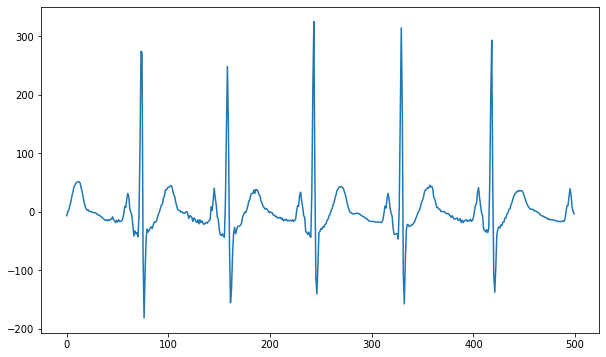

In [0]:
plt.figure(1, figsize=(10, 6))

plt.plot(d[1][500:1000])


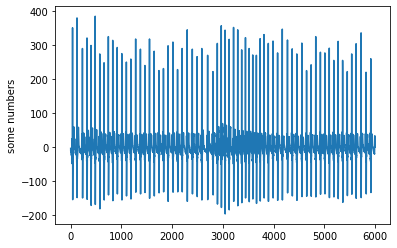

In [0]:
import matplotlib.pyplot as plt
plt.plot(d[1])
plt.ylabel('some numbers')
plt.show()

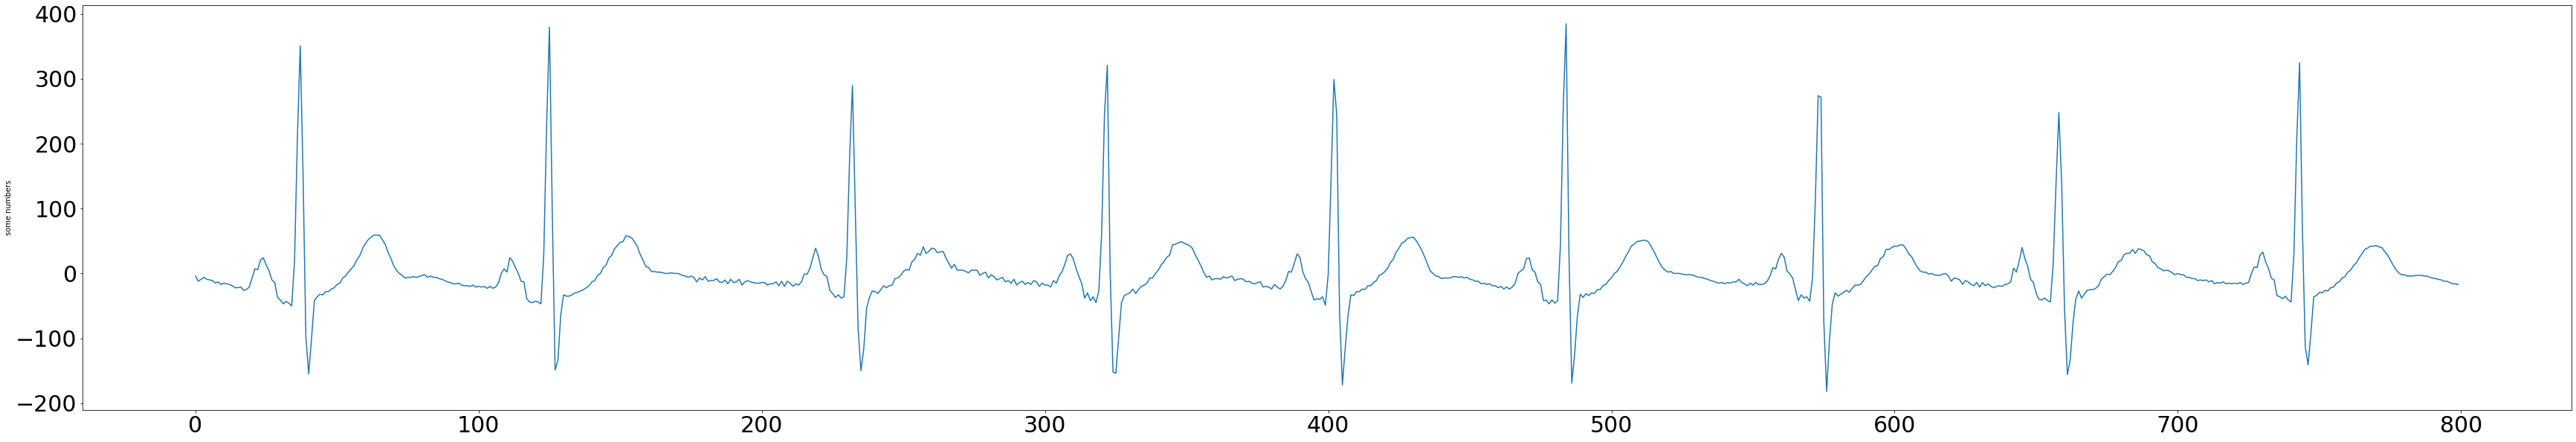

In [0]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

plt.figure(1, figsize=(60, 10))

plt.plot(d[1][0:800])
plt.ylabel('some numbers')
plt.show()

In [0]:

print(data[2][6000])
print(len(train_classes))
print(len(test_classes))
print(13290+3322)

0
9968
6644
16612


In [0]:
print(len(test_features))

3322


In [0]:
for e in test_features:
    pred_classes.append(clf.predict([e])[0])




In [0]:
count =0
num =16612

for i in range (num):
  ss = data[i][:-1]
  mop = clf.predict([ss])[0]
  if mop==data[i][6000]:
    count = count +1
  else:
    count=count

print(count)

print((count/num)*100)


15470
93.12545148085721
